# GLASS Test Suite

In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from matplotlib import cm
from chainconsumer import ChainConsumer

## UCB Model Samplers

### Detached binary injection

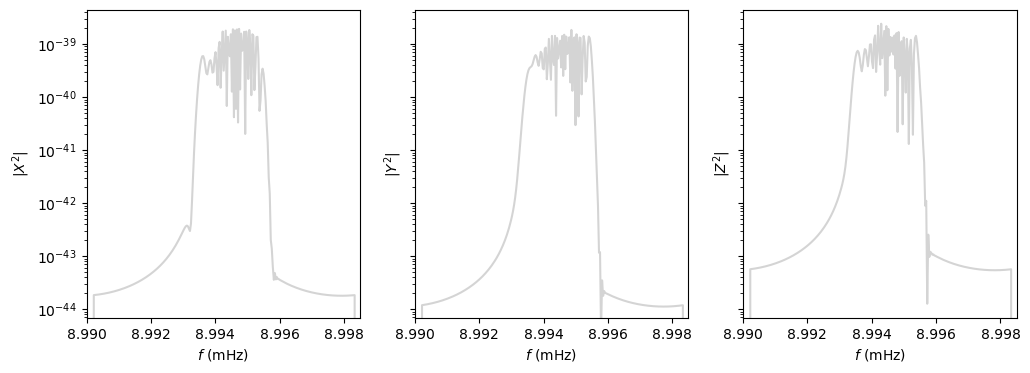

In [2]:
data_X = np.loadtxt('ucb/data/power_data.dat',usecols=(0,1))
data_Y = np.loadtxt('ucb/data/power_data.dat',usecols=(0,2))
data_Z = np.loadtxt('ucb/data/power_data.dat',usecols=(0,3))

fig,axs = plt.subplots(1,3,sharey=True, sharex=True, figsize=(12,4))
axs[0].semilogy(1000*data_X[:,0],data_X[:,1],color='gray',alpha=1/3)
axs[1].semilogy(1000*data_Y[:,0],data_Y[:,1],color='gray',alpha=1/3)
axs[2].semilogy(1000*data_Z[:,0],data_Z[:,1],color='gray',alpha=1/3)
axs[0].set_ylabel(r'$|X^2|$')
axs[1].set_ylabel(r'$|Y^2|$')
axs[2].set_ylabel(r'$|Z^2|$')
axs[0].set_xlabel(r'$f$ (mHz)')
axs[1].set_xlabel(r'$f$ (mHz)')
axs[2].set_xlabel(r'$f$ (mHz)')

axs[0].set_xlim(8.99,8.9985)

plt.show()

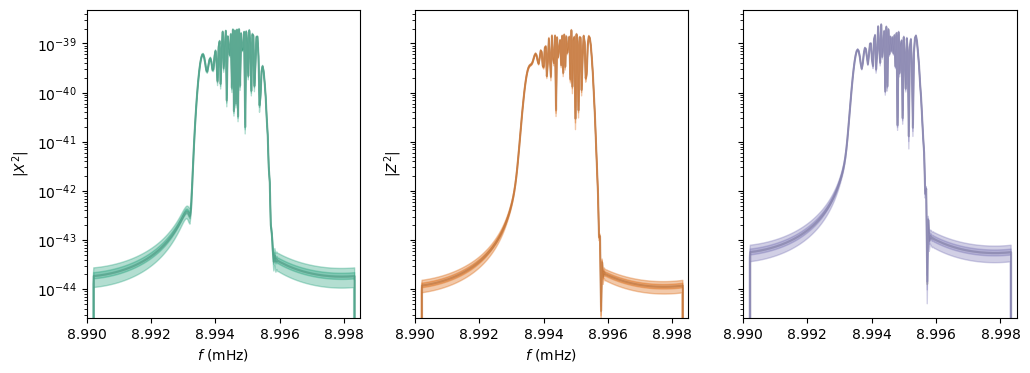

In [3]:
waveform_X = np.loadtxt('ucb/data/power_reconstruction.dat',usecols=(0,1,2,3,4,5))
waveform_Y = np.loadtxt('ucb/data/power_reconstruction.dat',usecols=(0,6,7,8,9,10))
waveform_Z = np.loadtxt('ucb/data/power_reconstruction.dat',usecols=(0,11,12,13,14,15))

colors = plt.cm.Dark2(np.linspace(0,1,8))

fig,axs = plt.subplots(1,3,sharey=True, sharex=True, figsize=(12,4))

axs[0].plot(1000*data_X[:,0],data_X[:,1],color='gray',alpha=1/3)
axs[0].fill_between(1000*waveform_X[:,0],waveform_X[:,4],waveform_X[:,5],color=colors[0],alpha=1/3)
axs[0].fill_between(1000*waveform_X[:,0],waveform_X[:,2],waveform_X[:,3],color=colors[0],alpha=1/3)
axs[0].plot(1000*waveform_X[:,0],waveform_X[:,1],color=colors[0],alpha=1/3)

axs[1].plot(1000*data_Y[:,0],data_Y[:,1],color='gray',alpha=1/3)
axs[1].fill_between(1000*waveform_Y[:,0],waveform_Y[:,4],waveform_Y[:,5],color=colors[1],alpha=1/3)
axs[1].fill_between(1000*waveform_Y[:,0],waveform_Y[:,2],waveform_Y[:,3],color=colors[1],alpha=1/3)
axs[1].plot(1000*waveform_Y[:,0],waveform_Y[:,1],color=colors[1],alpha=1/3)

axs[2].plot(1000*data_Z[:,0],data_Z[:,1],color='gray',alpha=1/3)
axs[2].fill_between(1000*waveform_Z[:,0],waveform_Z[:,4],waveform_Z[:,5],color=colors[2],alpha=1/3)
axs[2].fill_between(1000*waveform_Z[:,0],waveform_Z[:,2],waveform_Z[:,3],color=colors[2],alpha=1/3)
axs[2].plot(1000*waveform_Z[:,0],waveform_Z[:,1],color=colors[2],alpha=1/3)

axs[0].set_ylabel(r'$|X^2|$')
axs[1].set_ylabel(r'$|Y^2|$')
axs[1].set_ylabel(r'$|Z^2|$')
axs[0].set_xlabel(r'$f$ (mHz)')
axs[1].set_xlabel(r'$f$ (mHz)')
axs[1].set_xlabel(r'$f$ (mHz)')

axs[0].set_xlim(8.99,8.9985)

plt.yscale('log')

plt.show()

INFO:matplotlib.mathtext:Substituting symbol A from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol A from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol A from STIXNonUnicode


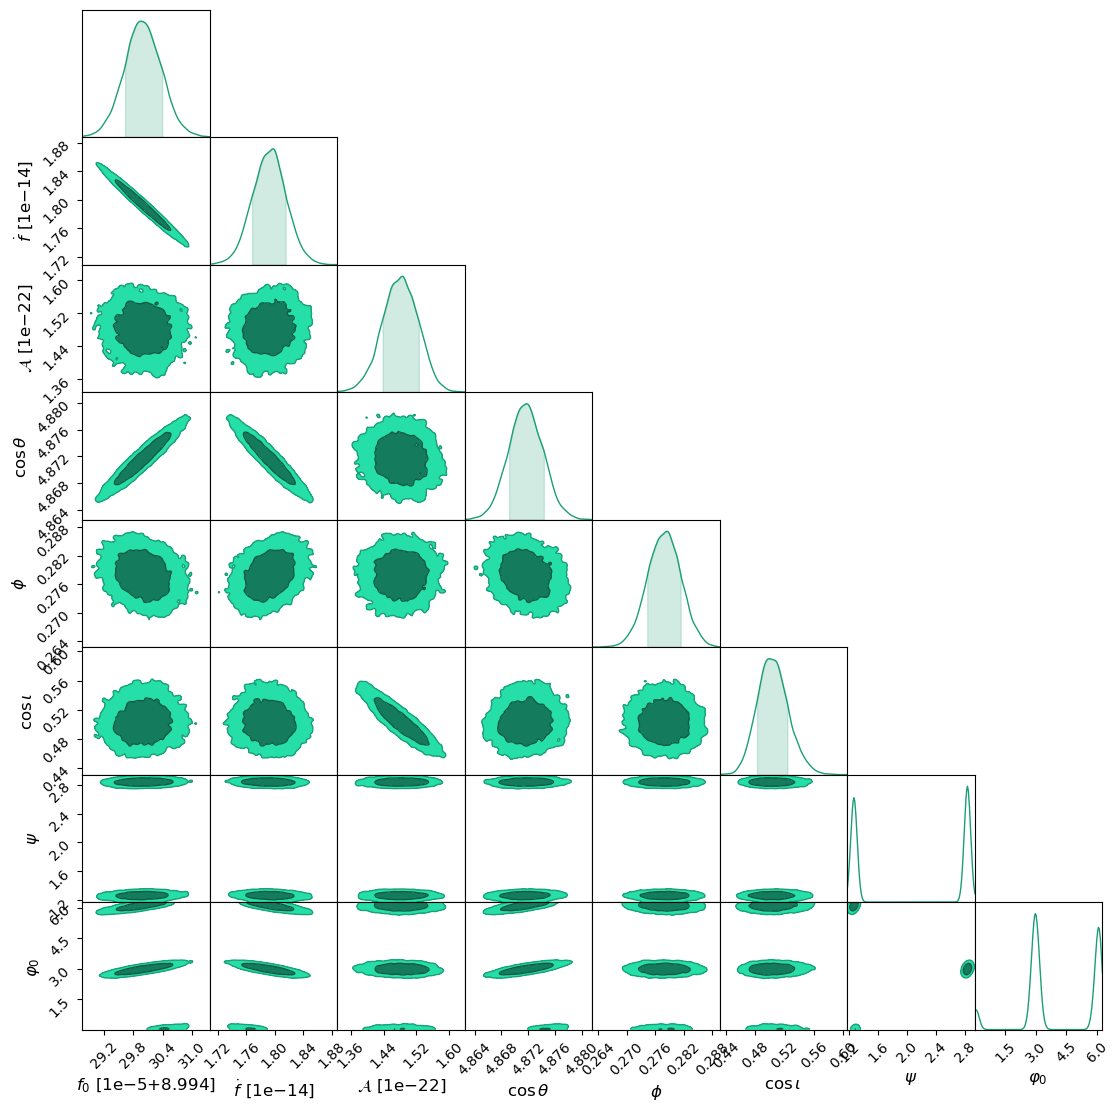

In [4]:
chain = np.loadtxt('ucb/chains/dimension_chain.dat.1',usecols=(0,1,2,3,4,5,6,7))
chain[:,0]=chain[:,0]*1000
parameters = [r'$f_0$',r'$\dot f$',r'$\mathcal{A}$',r'$\cos\theta$',r'$\phi$',r'$\cos\iota$',r'$\psi$',r'$\varphi_0$']
c = ChainConsumer()
c.add_chain(chain,parameters=parameters,color=colors[0])
plot=c.plotter.plot()


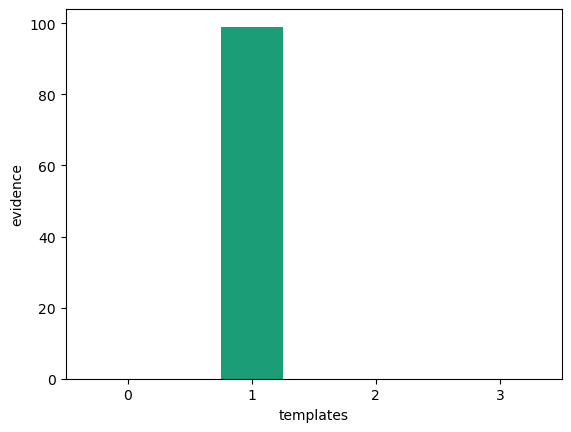

In [5]:
evidence=np.loadtxt('ucb/evidence.dat')
plt.bar(evidence[:,0],evidence[:,1],width=0.5,color=colors[0])
plt.xlim(-0.5,3.5)
plt.xticks(np.arange(0, 4, step=1))
plt.xlabel('templates')
plt.ylabel('evidence')
plt.show()

INFO:matplotlib.mathtext:Substituting symbol L from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol L from STIXNonUnicode


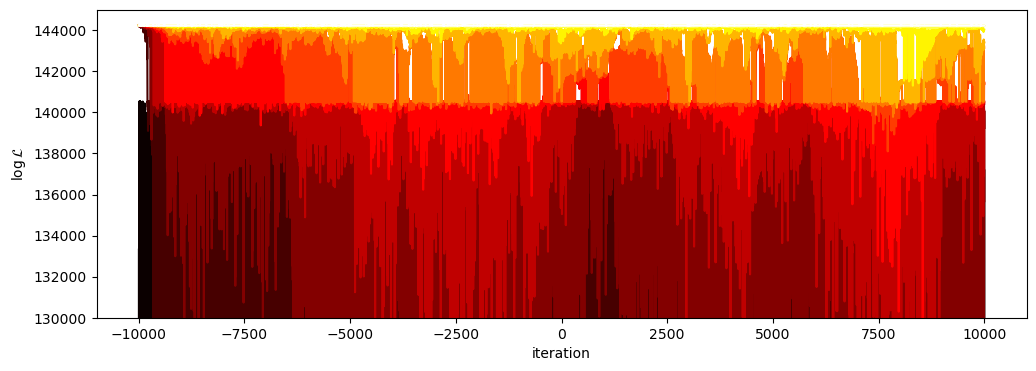

In [6]:
idx=np.loadtxt('ucb/chains/log_likelihood_chain.dat',usecols=(0))
logL=np.loadtxt('ucb/chains/log_likelihood_chain.dat',usecols=(1,2,3,4,5,6,7,8,9,10,11,12))
colors = plt.cm.hot(np.linspace(0,1,12))

fig,ax = plt.subplots(1,1,figsize=(12,4)) 

ax.set_prop_cycle('color',colors)
    
ax.plot(idx,logL[:,11])
ax.plot(idx,logL[:,10])
ax.plot(idx,logL[:,9])
ax.plot(idx,logL[:,8])
ax.plot(idx,logL[:,7])
ax.plot(idx,logL[:,6])
ax.plot(idx,logL[:,5])
ax.plot(idx,logL[:,4])
ax.plot(idx,logL[:,3])
ax.plot(idx,logL[:,2])
ax.plot(idx,logL[:,1])
ax.plot(idx,logL[:,0])

#ax.set_xlim(0,20000)
ax.set_ylim(130000,145000)

ax.set_ylabel(r'$\log\mathcal{L}$')
ax.set_xlabel(r'iteration')

plt.show()

### Verification binary injection

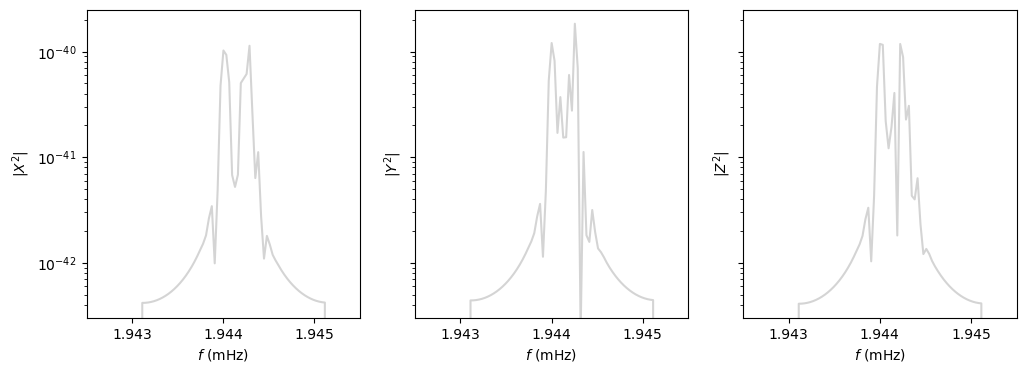

In [7]:
data_X = np.loadtxt('amcvn/data/power_data.dat',usecols=(0,1))
data_Y = np.loadtxt('amcvn/data/power_data.dat',usecols=(0,2))
data_Z = np.loadtxt('amcvn/data/power_data.dat',usecols=(0,3))

fig,axs = plt.subplots(1,3,sharey=True, sharex=True, figsize=(12,4))
axs[0].semilogy(1000*data_X[:,0],data_X[:,1],color='gray',alpha=1/3)
axs[1].semilogy(1000*data_Y[:,0],data_Y[:,1],color='gray',alpha=1/3)
axs[2].semilogy(1000*data_Z[:,0],data_Z[:,1],color='gray',alpha=1/3)
axs[0].set_ylabel(r'$|X^2|$')
axs[1].set_ylabel(r'$|Y^2|$')
axs[2].set_ylabel(r'$|Z^2|$')
axs[0].set_xlabel(r'$f$ (mHz)')
axs[1].set_xlabel(r'$f$ (mHz)')
axs[2].set_xlabel(r'$f$ (mHz)')

axs[0].set_xlim(1.9425,1.9455)

plt.show()

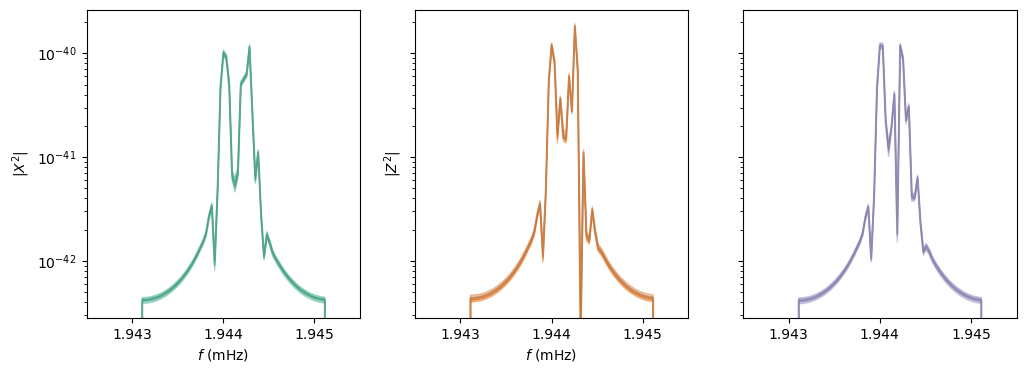

In [8]:
waveform_X = np.loadtxt('amcvn/data/power_reconstruction.dat',usecols=(0,1,2,3,4,5))
waveform_Y = np.loadtxt('amcvn/data/power_reconstruction.dat',usecols=(0,6,7,8,9,10))
waveform_Z = np.loadtxt('amcvn/data/power_reconstruction.dat',usecols=(0,11,12,13,14,15))

colors = plt.cm.Dark2(np.linspace(0,1,8))

fig,axs = plt.subplots(1,3,sharey=True, sharex=True, figsize=(12,4))

axs[0].plot(1000*data_X[:,0],data_X[:,1],color='gray',alpha=1/3)
axs[0].fill_between(1000*waveform_X[:,0],waveform_X[:,4],waveform_X[:,5],color=colors[0],alpha=1/3)
axs[0].fill_between(1000*waveform_X[:,0],waveform_X[:,2],waveform_X[:,3],color=colors[0],alpha=1/3)
axs[0].plot(1000*waveform_X[:,0],waveform_X[:,1],color=colors[0],alpha=1/3)

axs[1].plot(1000*data_Y[:,0],data_Y[:,1],color='gray',alpha=1/3)
axs[1].fill_between(1000*waveform_Y[:,0],waveform_Y[:,4],waveform_Y[:,5],color=colors[1],alpha=1/3)
axs[1].fill_between(1000*waveform_Y[:,0],waveform_Y[:,2],waveform_Y[:,3],color=colors[1],alpha=1/3)
axs[1].plot(1000*waveform_Y[:,0],waveform_Y[:,1],color=colors[1],alpha=1/3)

axs[2].plot(1000*data_Z[:,0],data_Z[:,1],color='gray',alpha=1/3)
axs[2].fill_between(1000*waveform_Z[:,0],waveform_Z[:,4],waveform_Z[:,5],color=colors[2],alpha=1/3)
axs[2].fill_between(1000*waveform_Z[:,0],waveform_Z[:,2],waveform_Z[:,3],color=colors[2],alpha=1/3)
axs[2].plot(1000*waveform_Z[:,0],waveform_Z[:,1],color=colors[2],alpha=1/3)

axs[0].set_ylabel(r'$|X^2|$')
axs[1].set_ylabel(r'$|Y^2|$')
axs[1].set_ylabel(r'$|Z^2|$')
axs[0].set_xlabel(r'$f$ (mHz)')
axs[1].set_xlabel(r'$f$ (mHz)')
axs[1].set_xlabel(r'$f$ (mHz)')

plt.yscale('log')
axs[0].set_xlim(1.9425,1.9455)

plt.show()

INFO:matplotlib.mathtext:Substituting symbol A from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol A from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol A from STIXNonUnicode


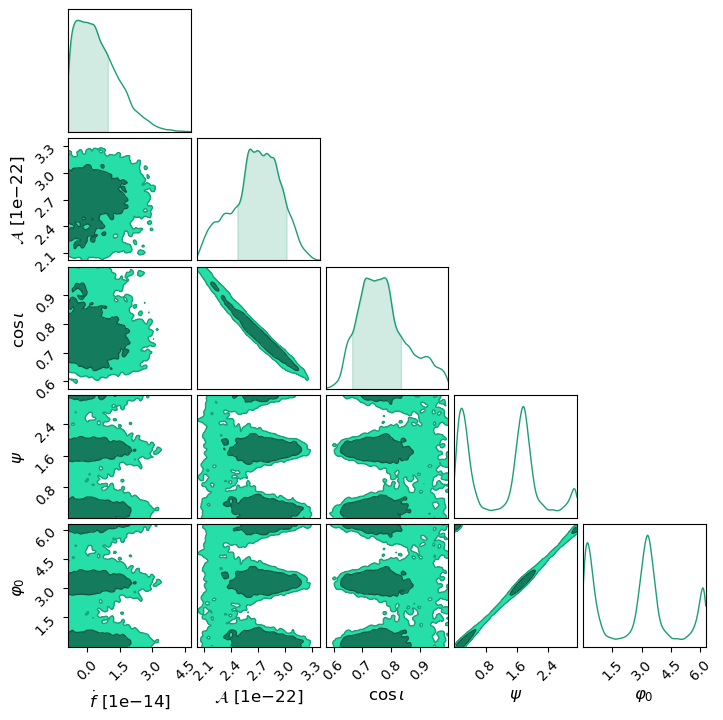

In [9]:
chain = np.loadtxt('amcvn/chains/dimension_chain.dat.1',usecols=(1,2,5,6,7))
chain[:,0]=chain[:,0]*1000
colors = plt.cm.Dark2(np.linspace(0,1,8))
parameters = [r'$\dot f$',r'$\mathcal{A}$',r'$\cos\iota$',r'$\psi$',r'$\varphi_0$']
c = ChainConsumer()
c.add_chain(chain,parameters=parameters,color=colors[0])
plot=c.plotter.plot()



## Noise Model Samplers

### Spline model

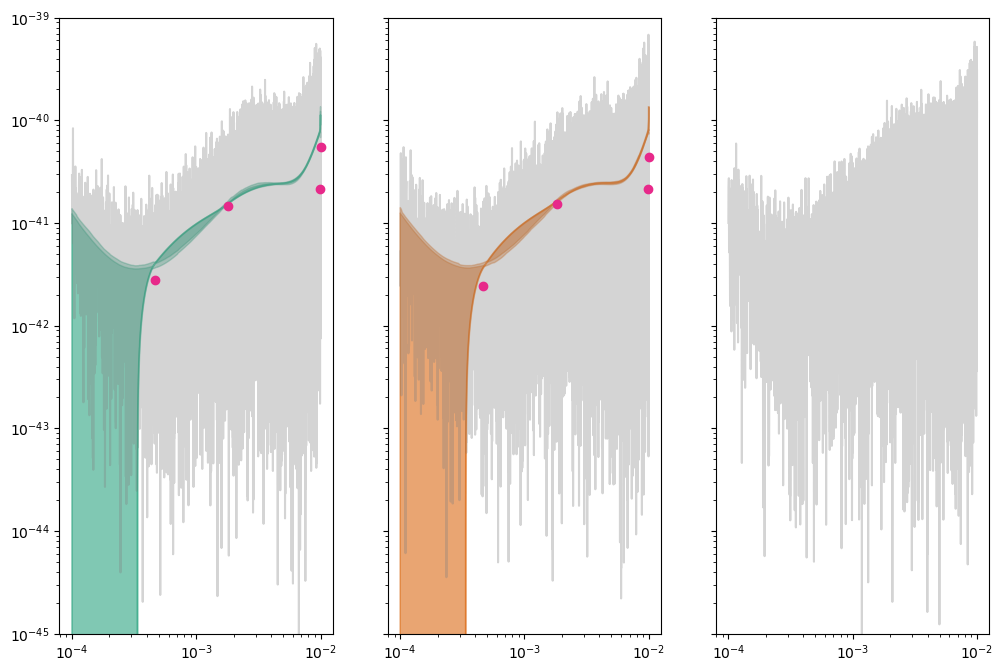

In [14]:
data_X = np.loadtxt('noise_spline_mcmc/data/power_data.dat',usecols=(0,1))
data_Y = np.loadtxt('noise_spline_mcmc/data/power_data.dat',usecols=(0,2))
data_Z = np.loadtxt('noise_spline_mcmc/data/power_data.dat',usecols=(0,3))

noise_X = np.loadtxt('noise_spline_mcmc/data/power_noise_reconstruction.dat',usecols=(0,1,2,3,4,5))
noise_Y = np.loadtxt('noise_spline_mcmc/data/power_noise_reconstruction.dat',usecols=(0,6,7,8,9,10))
noise_Z = np.loadtxt('noise_spline_mcmc/data/power_noise_reconstruction.dat',usecols=(0,11,12,13,14,15))

spline_X = np.loadtxt('noise_spline_mcmc/data/final_spline_points.dat',usecols=(0,1))
spline_Y = np.loadtxt('noise_spline_mcmc/data/final_spline_points.dat',usecols=(0,2))
spline_Z = np.loadtxt('noise_spline_mcmc/data/final_spline_points.dat',usecols=(0,3))


colors = plt.cm.Dark2(np.linspace(0,1,8))


fig,axs = plt.subplots(1,3,sharey=True,sharex=True,figsize=(12,8))

axs[0].plot(data_X[:,0],data_X[:,1]*2,color='gray',alpha=1/3)
axs[0].fill_between(noise_X[:,0],noise_X[:,4],noise_X[:,5],color=colors[0],alpha=1/3)
axs[0].fill_between(noise_X[:,0],noise_X[:,2],noise_X[:,3],color=colors[0],alpha=1/3)
axs[0].plot(noise_X[:,0],noise_X[:,1],color=colors[0],alpha=1/3)
axs[0].plot(spline_X[:,0],spline_X[:,1],color=colors[3],linestyle='',marker='o')


axs[1].plot(data_Y[:,0],data_Y[:,1]*2,color='gray',alpha=1/3)
axs[1].fill_between(noise_Y[:,0],noise_Y[:,4],noise_Y[:,5],color=colors[1],alpha=1/3)
axs[1].fill_between(noise_Y[:,0],noise_Y[:,2],noise_Y[:,3],color=colors[1],alpha=1/3)
axs[1].plot(noise_Y[:,0],noise_Y[:,1],color=colors[1],alpha=1/3)
axs[1].plot(spline_Y[:,0],spline_Y[:,1],color=colors[3],linestyle='',marker='o')

axs[2].plot(data_Z[:,0],data_Z[:,1]*2,color='gray',alpha=1/3)
axs[2].fill_between(noise_Z[:,0],noise_Z[:,4],noise_Z[:,5],color=colors[2],alpha=1/3)
axs[2].fill_between(noise_Z[:,0],noise_Z[:,2],noise_Z[:,3],color=colors[2],alpha=1/3)
axs[2].plot(noise_Z[:,0],noise_Z[:,1],color=colors[2],alpha=1/3)
axs[2].plot(spline_Z[:,0],spline_Z[:,1],color=colors[3],linestyle='',marker='o')

plt.ylim(1e-45,1e-39)
plt.yscale('log')
plt.xscale('log')



plt.show()


### Parameterized model

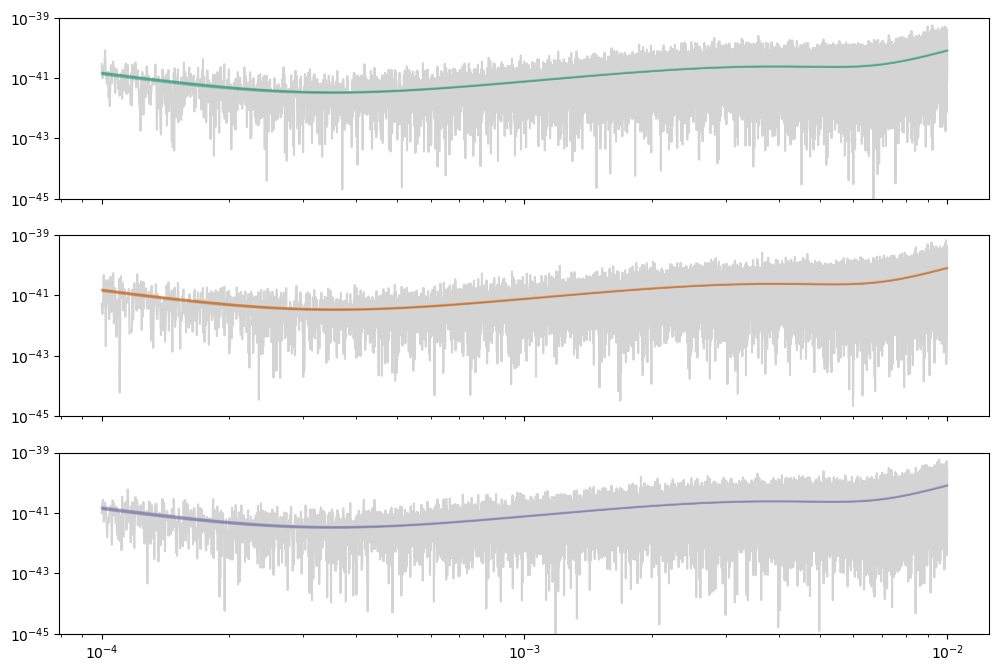

In [11]:
data_X = np.loadtxt('noise_mcmc/data/power_data.dat',usecols=(0,1))
data_Y = np.loadtxt('noise_mcmc/data/power_data.dat',usecols=(0,2))
data_Z = np.loadtxt('noise_mcmc/data/power_data.dat',usecols=(0,3))

noise_X = np.loadtxt('noise_mcmc/data/power_noise_reconstruction.dat',usecols=(0,1,2,3,4,5))
noise_Y = np.loadtxt('noise_mcmc/data/power_noise_reconstruction.dat',usecols=(0,6,7,8,9,10))
noise_Z = np.loadtxt('noise_mcmc/data/power_noise_reconstruction.dat',usecols=(0,11,12,13,14,15))

# spline_X = np.loadtxt('noise_spline_mcmc/data/final_spline_points.dat',usecols=(0,1))
# spline_Y = np.loadtxt('noise_spline_mcmc/data/final_spline_points.dat',usecols=(0,2))
# spline_Z = np.loadtxt('noise_spline_mcmc/data/final_spline_points.dat',usecols=(0,3))


colors = plt.cm.Dark2(np.linspace(0,1,8))


fig,axs = plt.subplots(3,1,sharey=True,sharex=True,figsize=(12,8))

axs[0].plot(data_X[:,0],data_X[:,1]*2,color='gray',alpha=1/3)
axs[0].fill_between(noise_X[:,0],noise_X[:,4],noise_X[:,5],color=colors[0],alpha=1/3)
axs[0].fill_between(noise_X[:,0],noise_X[:,2],noise_X[:,3],color=colors[0],alpha=1/3)
axs[0].plot(noise_X[:,0],noise_X[:,1],color=colors[0],alpha=1/3)
# axs[0].plot(spline_X[:,0],spline_X[:,1],color=colors[3],linestyle='',marker='o')


axs[1].plot(data_Y[:,0],data_Y[:,1]*2,color='gray',alpha=1/3)
axs[1].fill_between(noise_Y[:,0],noise_Y[:,4],noise_Y[:,5],color=colors[1],alpha=1/3)
axs[1].fill_between(noise_Y[:,0],noise_Y[:,2],noise_Y[:,3],color=colors[1],alpha=1/3)
axs[1].plot(noise_Y[:,0],noise_Y[:,1],color=colors[1],alpha=1/3)
# axs[1].plot(spline_Y[:,0],spline_Y[:,1],color=colors[3],linestyle='',marker='o')

axs[2].plot(data_Z[:,0],data_Z[:,1]*2,color='gray',alpha=1/3)
axs[2].fill_between(noise_Z[:,0],noise_Z[:,4],noise_Z[:,5],color=colors[2],alpha=1/3)
axs[2].fill_between(noise_Z[:,0],noise_Z[:,2],noise_Z[:,3],color=colors[2],alpha=1/3)
axs[2].plot(noise_Z[:,0],noise_Z[:,1],color=colors[2],alpha=1/3)
# axs[2].plot(spline_Z[:,0],spline_Z[:,1],color=colors[3],linestyle='',marker='o')

plt.ylim(1e-45,1e-39)
plt.yscale('log')
plt.xscale('log')



plt.show()


## Verification binary (targeted search) sampler

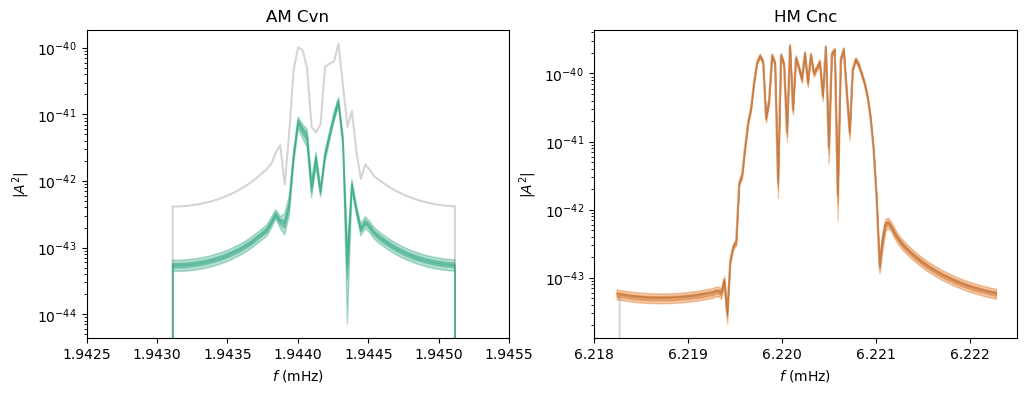

In [12]:
data_hmcnc = np.loadtxt('vgb_mcmc/seg00/data/power_data.dat',usecols=(0,1))
data_amcvn = np.loadtxt('vgb_mcmc/seg01/data/power_data.dat',usecols=(0,1))

hmcnc = np.loadtxt('vgb_mcmc/seg00/data/power_reconstruction.dat',usecols=(0,1,2,3,4,5))
amcvn = np.loadtxt('vgb_mcmc/seg01/data/power_reconstruction.dat',usecols=(0,1,2,3,4,5))

colors = plt.cm.Dark2(np.linspace(0,1,8))

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(1000*data_amcvn[:,0],data_amcvn[:,1],color='gray',alpha=1/3)
ax[0].fill_between(1000*amcvn[:,0],amcvn[:,4],amcvn[:,5],color=colors[0],alpha=1/3)
ax[0].fill_between(1000*amcvn[:,0],amcvn[:,2],amcvn[:,3],color=colors[0],alpha=1/3)
ax[0].plot(1000*amcvn[:,0],amcvn[:,1],color=colors[0],alpha=1/3,label='amcvn')

ax[1].plot(1000*data_hmcnc[:,0],data_hmcnc[:,1],color='gray',alpha=1/3)
ax[1].fill_between(1000*hmcnc[:,0],hmcnc[:,4],hmcnc[:,5],color=colors[1],alpha=1/3)
ax[1].fill_between(1000*hmcnc[:,0],hmcnc[:,2],hmcnc[:,3],color=colors[1],alpha=1/3)
ax[1].plot(1000*hmcnc[:,0],hmcnc[:,1],color=colors[1],alpha=1/3,label='hmcnc')

ax[0].set_ylabel(r'$|A^2|$')
ax[0].set_xlabel(r'$f$ (mHz)')
ax[1].set_ylabel(r'$|A^2|$')
ax[1].set_xlabel(r'$f$ (mHz)')

ax[0].set_yscale('log')
ax[1].set_yscale('log')

ax[0].set_title('AM Cvn')
ax[1].set_title('HM Cnc')

ax[0].set_xlim(1.9425,1.9455)
ax[1].set_xlim(6.218,6.2225)


plt.show()

INFO:matplotlib.mathtext:Substituting symbol A from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol A from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol A from STIXNonUnicode


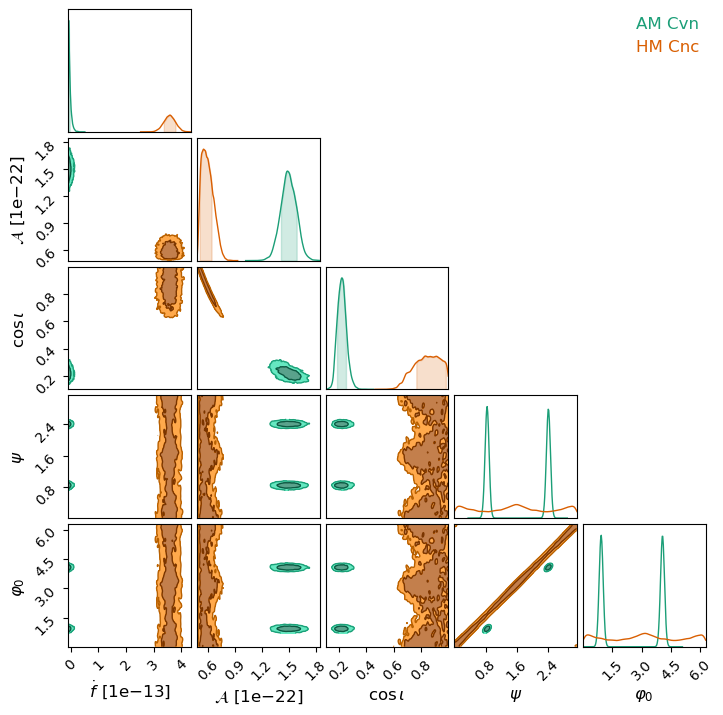

In [13]:
amcvn = np.loadtxt('vgb_mcmc/seg01/chains/dimension_chain.dat.1',usecols=(1,2,5,6,7))
amcvn[:,0]=amcvn[:,0]*1000

hmcnc = np.loadtxt('vgb_mcmc/seg00/chains/dimension_chain.dat.1',usecols=(1,2,5,6,7))
hmcnc[:,0]=hmcnc[:,0]*1000


parameters = [r'$\dot f$',r'$\mathcal{A}$',r'$\cos\iota$',r'$\psi$',r'$\varphi_0$']

colors = plt.cm.Dark2(np.linspace(0,1,8))
c = ChainConsumer()
c.add_chain(amcvn,parameters=parameters,color=colors[0],name='AM Cvn')
c.add_chain(hmcnc,parameters=parameters,color=colors[1],name='HM Cnc')

plot=c.plotter.plot()



## Global Fit sampler